In [4]:
import pandas as pd

In [29]:
# Read the CSV file
#df = pd.read_csv(r'C:\Users\ZZ029K826\Documents\Personal\Copii\Dimi\KLEBSIELLA\KLEBSIELLA\KLEBSIELLA.csv', header=None)

# Read the xlsx file

data = pd.read_excel(r'C:\Users\ZZ029K826\Documents\Personal\Copii\Dimi\KLEBSIELLA\KLEBSIELLA\ANALIZE\KLEBSIELLAlucru.xlsx', header=0)


### Corelatii cu Comorbiditati

In [30]:
# Find the column that starts with 'CMB Imuno'
imuno_col = [col for col in data.columns if col.startswith('CMB Imuno')][0]

# Rename the column
data = data.rename(columns={imuno_col: 'CMB Imunodepresie'})


# Find the column that starts with 'CMB Imuno'
stare_col = [col for col in data.columns if col.startswith('Starea pacientului')][0]
# Rename the column
data = data.rename(columns={stare_col: 'Stare externare'})
# Convert the 'Stare externare' column to numeric, non-numeric values become NaN



In [31]:
# Print the updated DataFrame
data.head()

,Nr crt,"Nume, Prenume",FO Nr.,SEX (F/M),Varsta,LOCATIE,Mediu provenienta (U/R),Institutionalizat (Da/Nu),Hemodializa (Da/Nu),Internat prin transfer (Da/Nu),...,TCA-L PIPERACILIN/TAZOBACTAM,TCA-L AMPICILINA/SULBACTAM,TCA-L CEFTRIAXONA,TCA-L AMOXICILINA/ACID-CLAVULANIC,TCA-L RIFAMPICINA,"Tratament administrat conform antibiogramei (Da=1, Nu=0)",Durata tratamentului (zile),Cultura de control (Da/Nu),"Daca Da cultura de control, rezultat: Negativa - 0 /Pozitiva -1",Stare externare
0,1,GHIORGHICA ALEXANDRINA,501821,F,68,A1,U,NU,NU,NU,...,NaN,NaN,NaN,NaN,NaN,1.0,18.0,DA,1.0,1
1,2,SANDA VERGIL,500607,M,72,A1,R,NU,NU,NU,...,NaN,DA,NaN,NaN,NaN,1.0,12.0,NU,NaN,1
2,3,COTOLAN IOANA,201754,F,87,A1,R,NU,NU,NU,...,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NU,NaN,1
3,4,JECU MARILENA,502307,F,77,A1,U,DA,NU,NU,...,NaN,NaN,NaN,NaN,NaN,1.0,26.0,DA,1.0,3
4,5,VISAN CONSTANTIN,501188,M,68,A1,U,NU,NU,DA,...,NaN,NaN,NaN,NaN,NaN,1.0,12.0,DA,1.0,1


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_probability_heatmap(data, startswith):
    # Get unique 'Tip-K' values
    tip_k_values = data['Tip-K'].unique()

    # Get column names that start with the specified string
    columns = [col for col in data.columns if col.startswith(startswith)]

    # Initialize DataFrame for probabilities
    df_prob = pd.DataFrame(index=tip_k_values, columns=columns)

    # Iterate over each column
    for col in columns:
        # Calculate probability for each 'Tip-K' value
        for value in tip_k_values:
            total = len(data[data['Tip-K'] == value])
            count = len(data[(data['Tip-K'] == value) & (data[col] == 1)])
            df_prob.loc[value, col] = count / total * 100

    # Convert the values in df_prob to float
    df_prob = df_prob.astype(float)

    # Transpose the DataFrame
    df_prob = df_prob.T

    # Plot the probabilities as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_prob, annot=True, cmap='YlOrRd')
    plt.title('Probability Heatmap')
    plt.show()



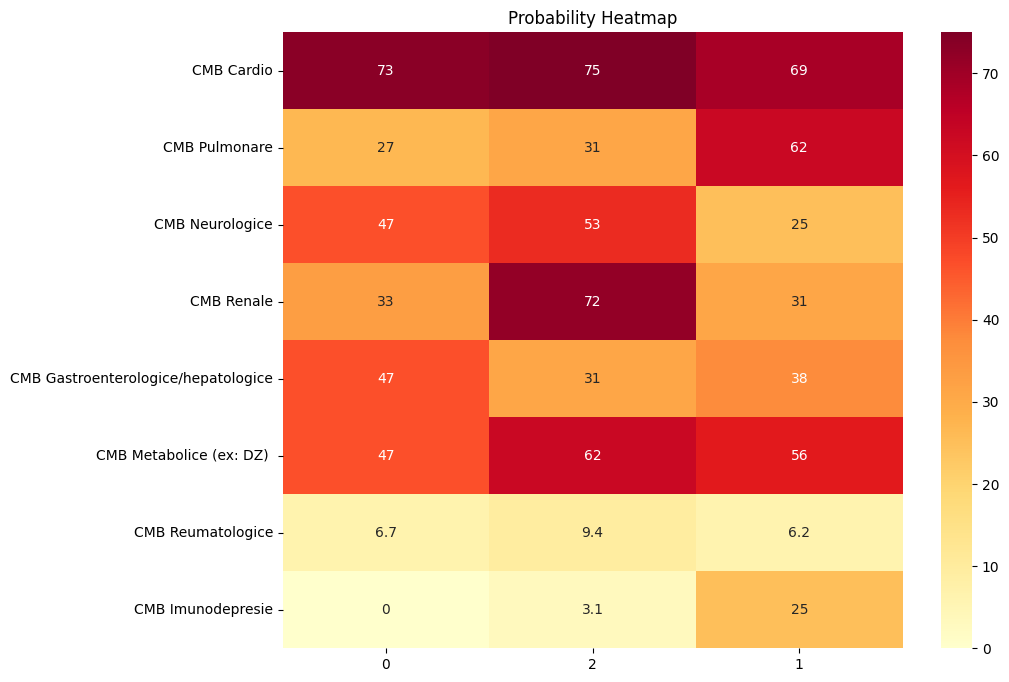

In [9]:
# Call the function
plot_probability_heatmap(data, 'CMB')

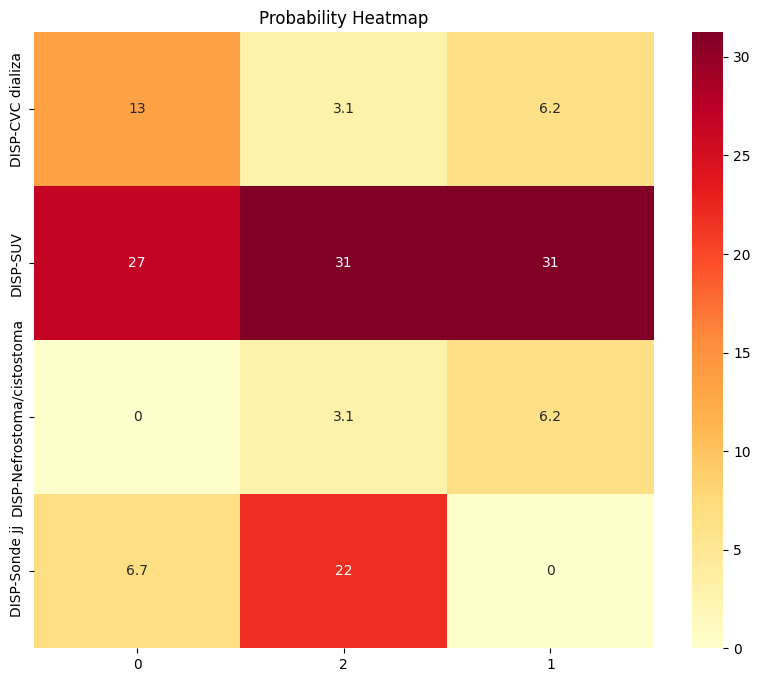

In [10]:
# Call the function
plot_probability_heatmap(data, 'DISP-')

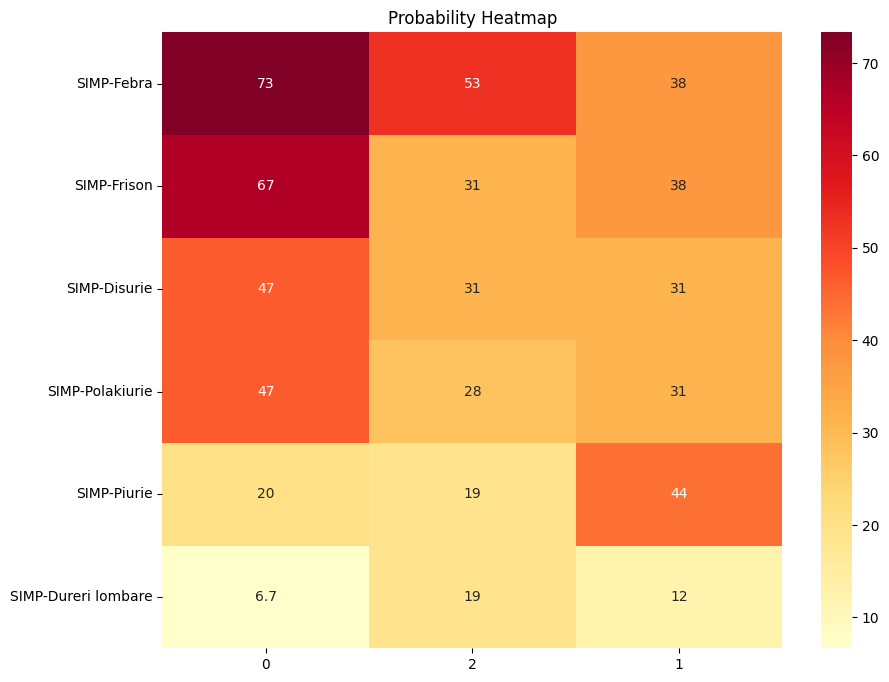

In [11]:
# Call the function
plot_probability_heatmap(data, 'SIMP-')

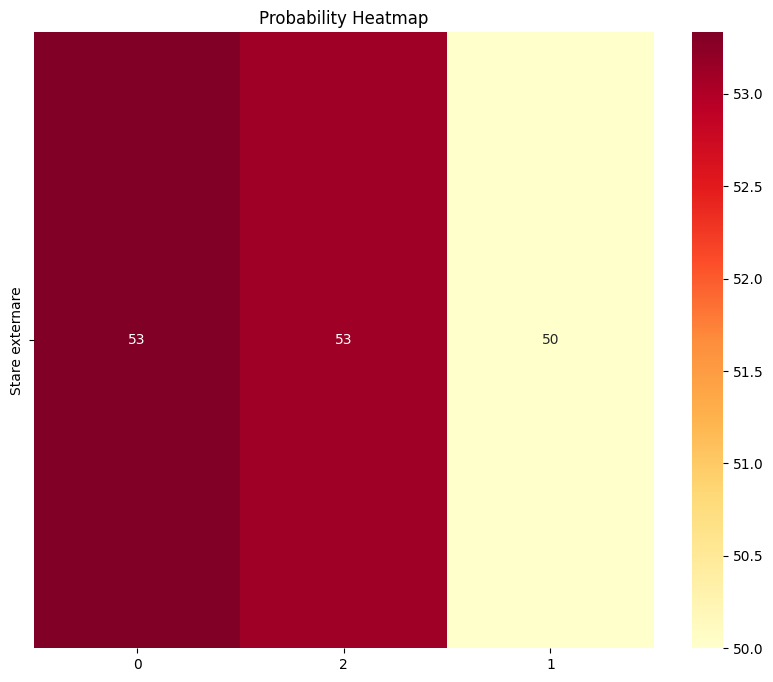

In [12]:
# Call the function
plot_probability_heatmap(data, 'Stare externare')

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_probability_ext_heatmap(data, startswith):
    # Get unique 'Stare externare' values
    stare_externare_values = data['Stare externare'].unique()

    # Get column names that start with the specified string
    columns = [col for col in data.columns if col.startswith(startswith)]

    # Initialize DataFrame for probabilities
    df_prob = pd.DataFrame(index=stare_externare_values, columns=columns)

    # Iterate over each column
    for col in columns:
        # Calculate probability for each 'Stare externare' value
        for value in stare_externare_values:
            total = len(data[data['Stare externare'] == value])
            count = len(data[(data['Stare externare'] == value) & (data[col] == 1)])
            df_prob.loc[value, col] = count / total * 100

    # Convert the values in df_prob to float
    df_prob = df_prob.astype(float)

    # Transpose the DataFrame
    df_prob = df_prob.T

    # Plot the probabilities as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_prob, annot=True, cmap='YlOrRd')
    plt.title('Probability Heatmap')
    plt.show()

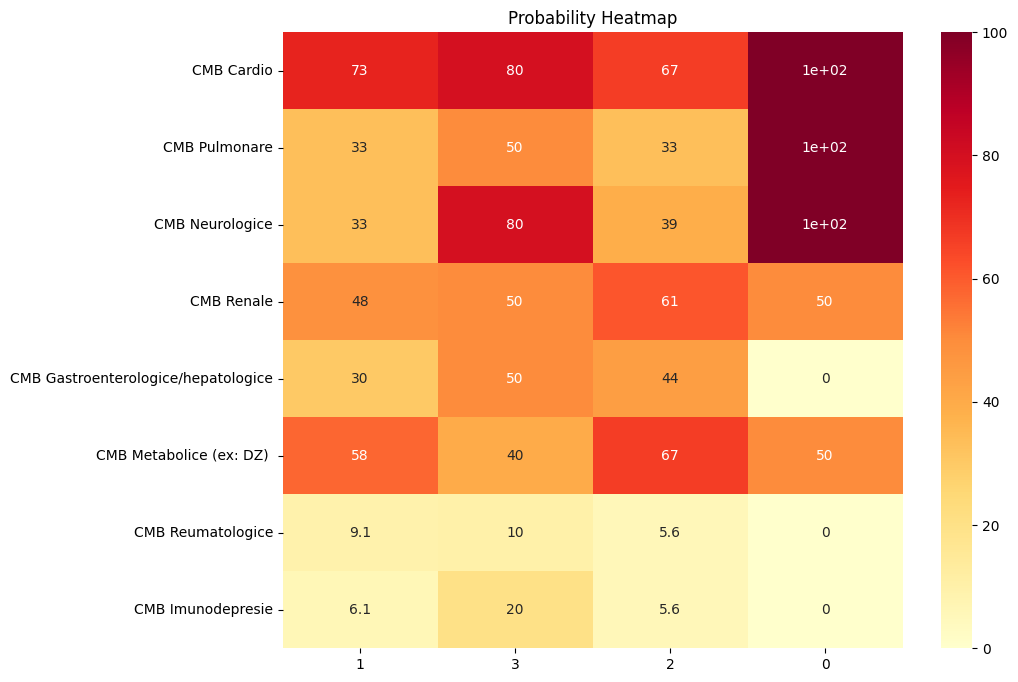

In [34]:
plot_probability_ext_heatmap(data, 'CMB')

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_probability_ext_k_heatmap(data, startswith):
    # Get unique 'Tip-K' values
    tip_k_values = data['Tip-K'].unique()

    # Get column names that start with the specified string
    columns = [col for col in data.columns if col.startswith(startswith)]

    # Iterate over each 'Tip-K' value
    for tip_k_value in tip_k_values:
        # Filter the data by the current 'Tip-K' value
        data_filtered = data[data['Tip-K'] == tip_k_value]

        # Get unique 'Stare externare' values
        stare_externare_values = data_filtered['Stare externare'].unique()

        # Initialize DataFrame for probabilities
        df_prob = pd.DataFrame(index=stare_externare_values, columns=columns)

        # Iterate over each column
        for col in columns:
            # Calculate probability for each 'Stare externare' value
            for value in stare_externare_values:
                total = len(data_filtered[data_filtered['Stare externare'] == value])
                count = len(data_filtered[(data_filtered['Stare externare'] == value) & (data_filtered[col] == 1)])
                df_prob.loc[value, col] = count / total * 100

        # Convert the values in df_prob to float
        df_prob = df_prob.astype(float)

        # Transpose the DataFrame
        df_prob = df_prob.T

        # Plot the probabilities as a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_prob, annot=True, cmap='YlOrRd')
        plt.title(f'Probability Heatmap for Tip-K = {tip_k_value}')
        plt.show()

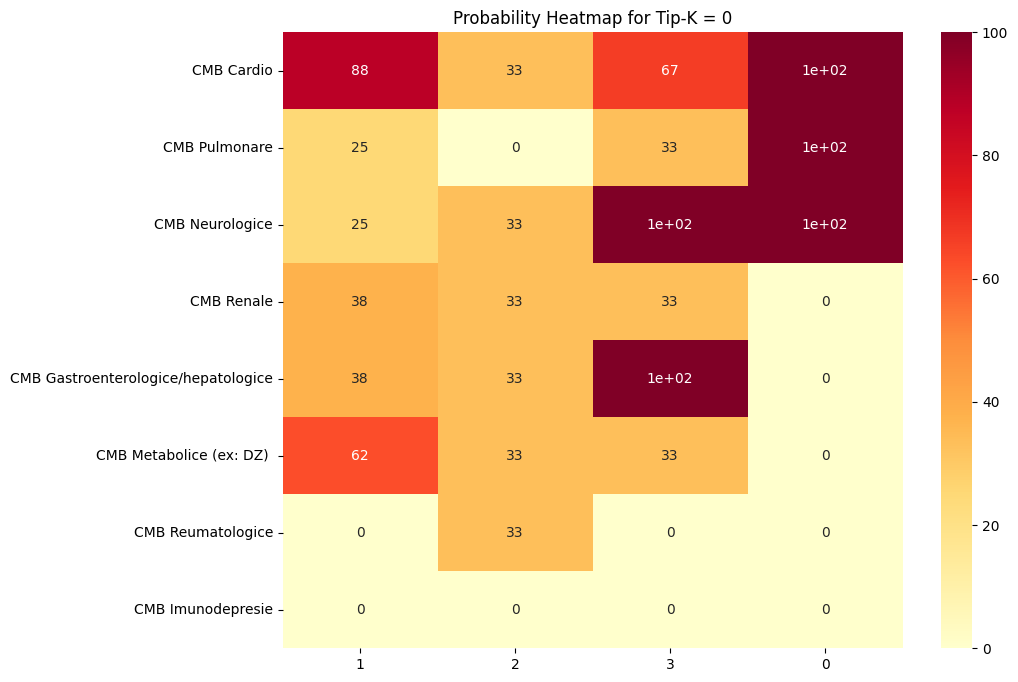

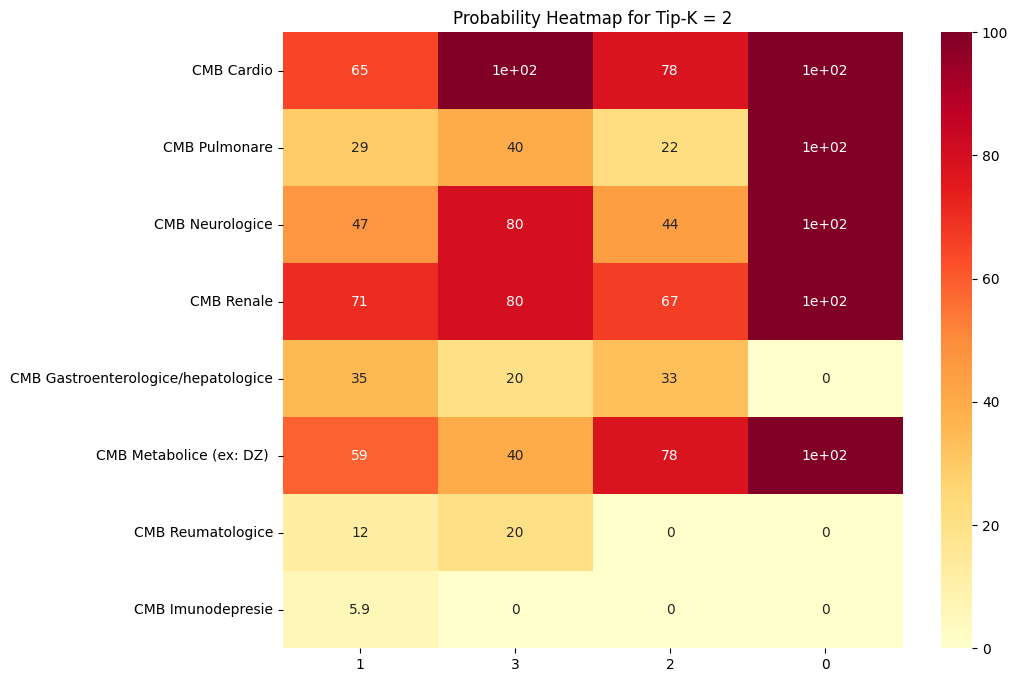

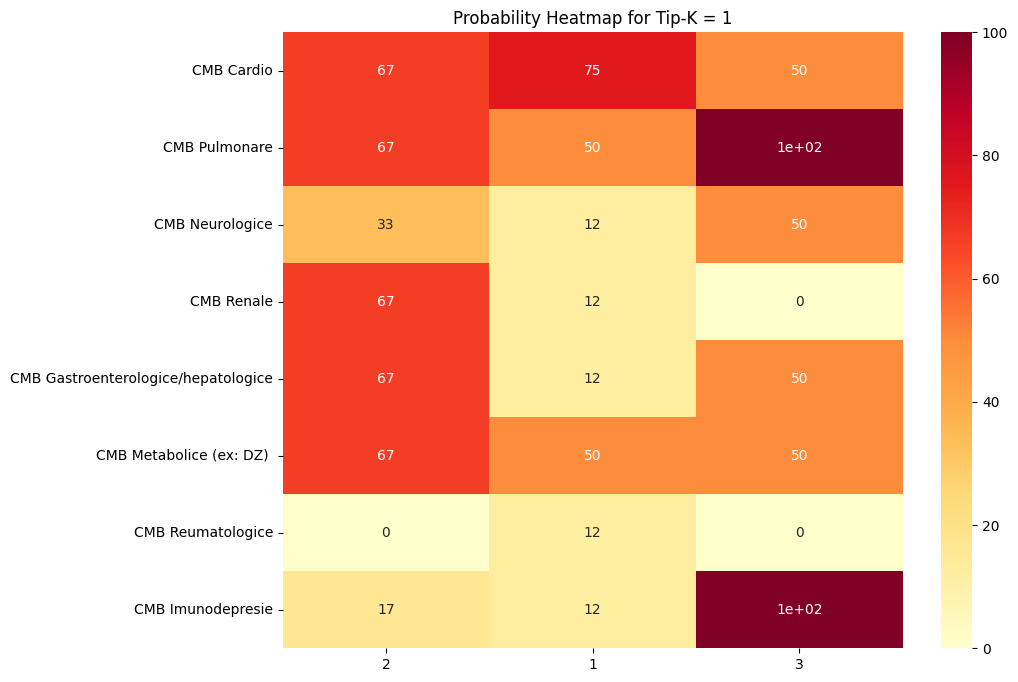

In [36]:
plot_probability_ext_k_heatmap(data, 'CMB')

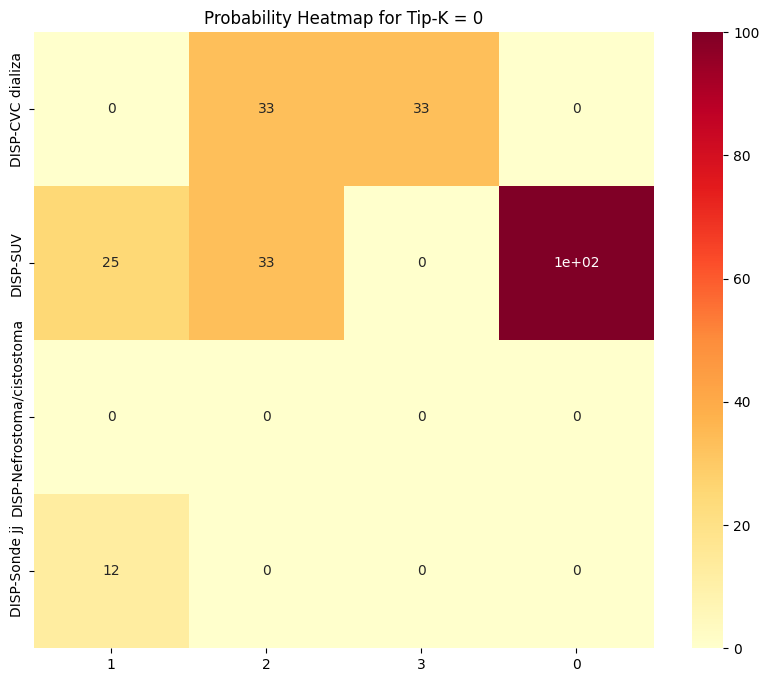

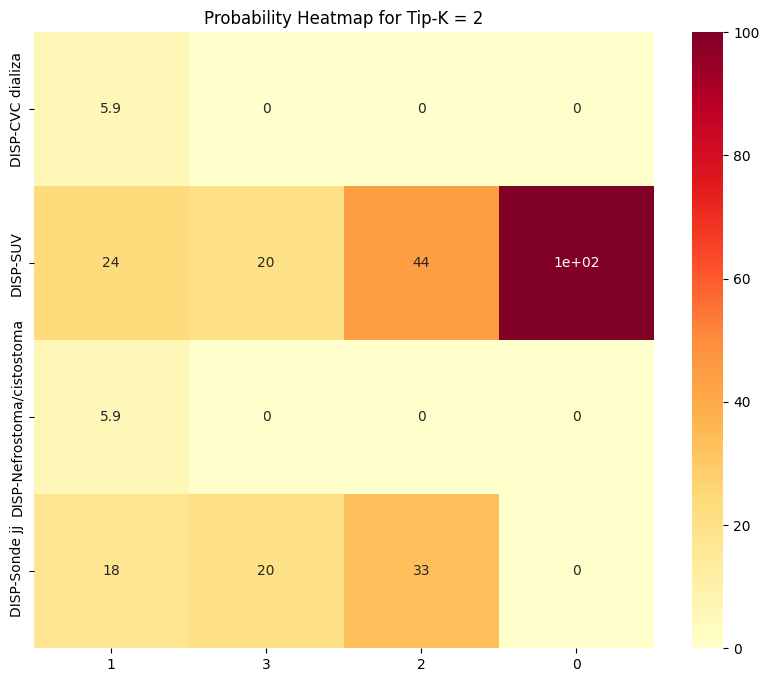

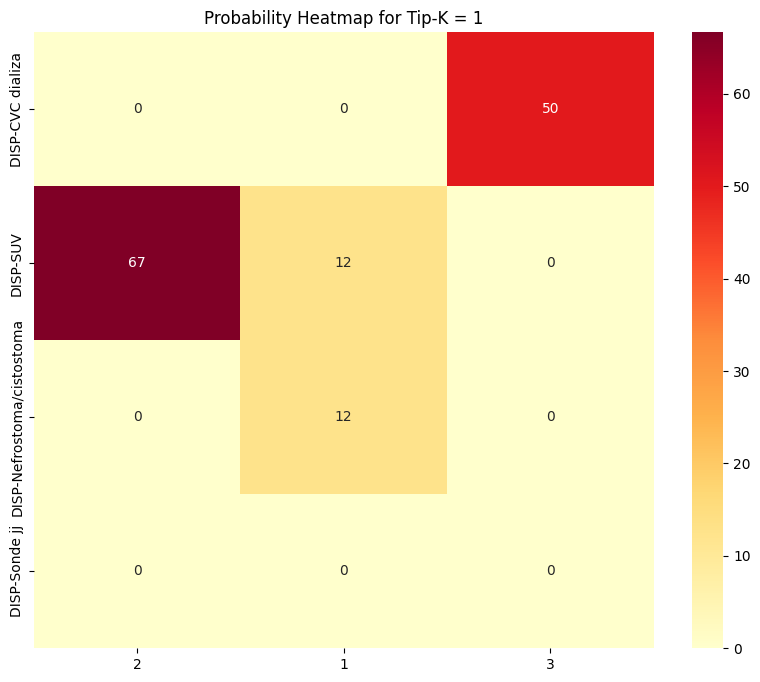

In [37]:
plot_probability_ext_k_heatmap(data, 'DISP')

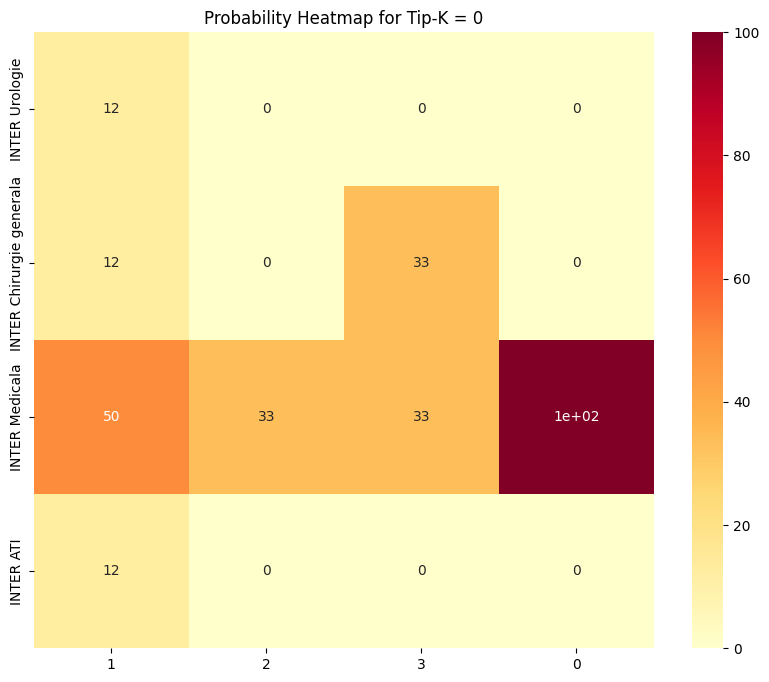

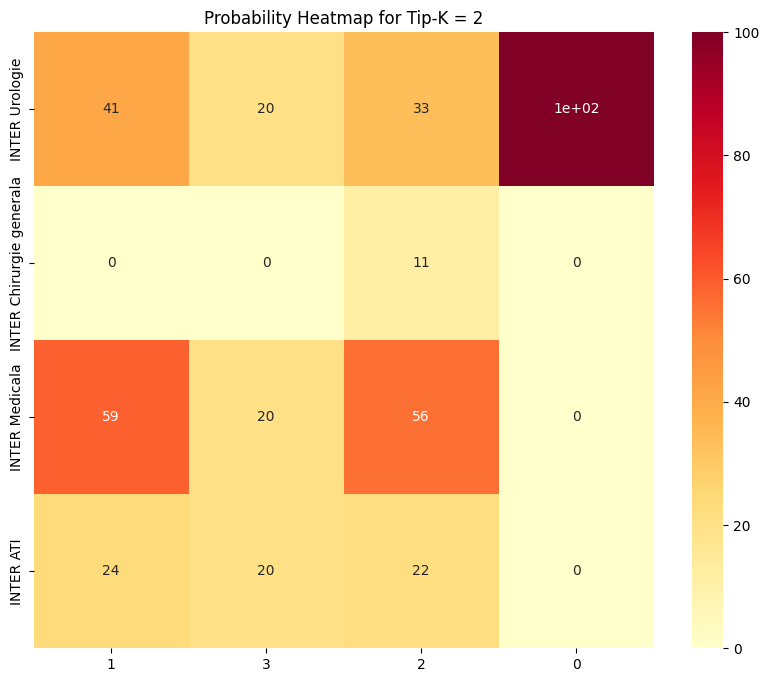

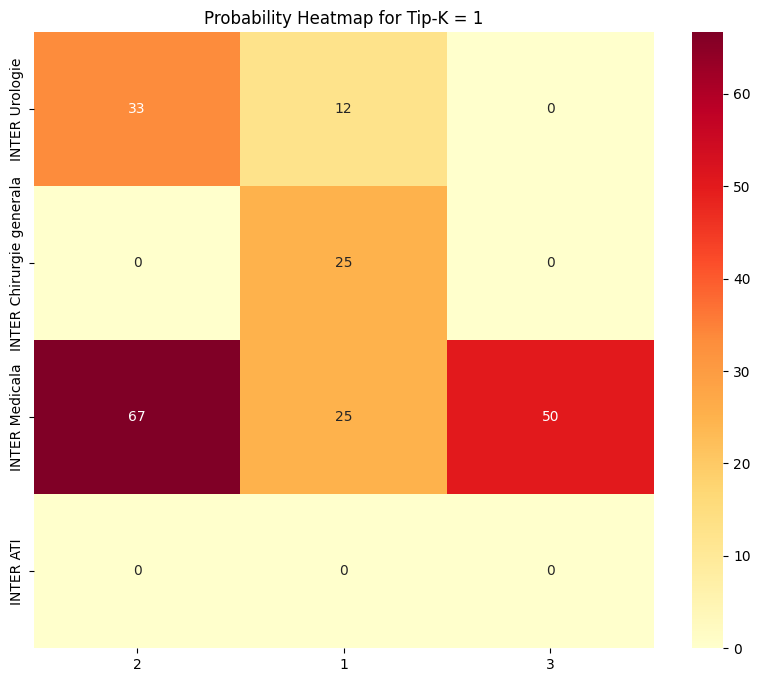

In [38]:
plot_probability_ext_k_heatmap(data, 'INTER')

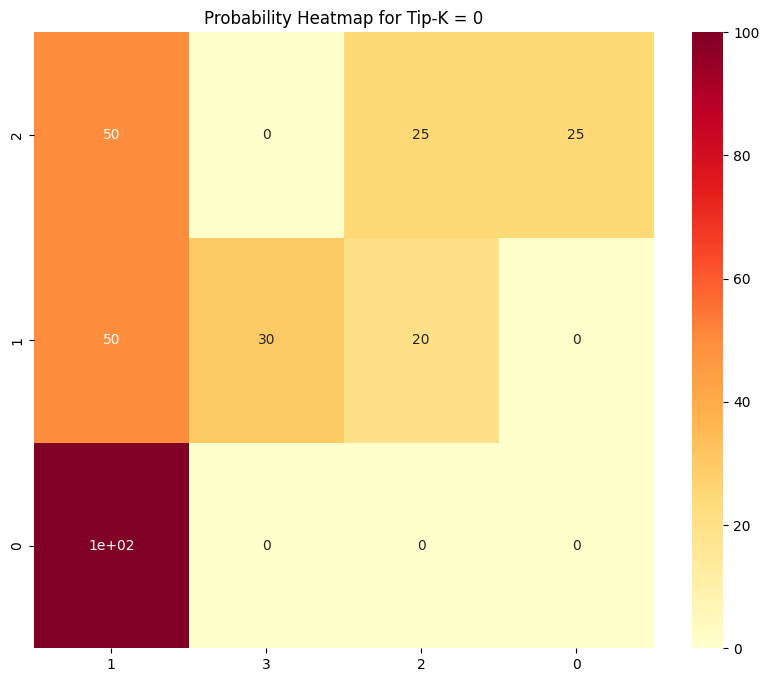

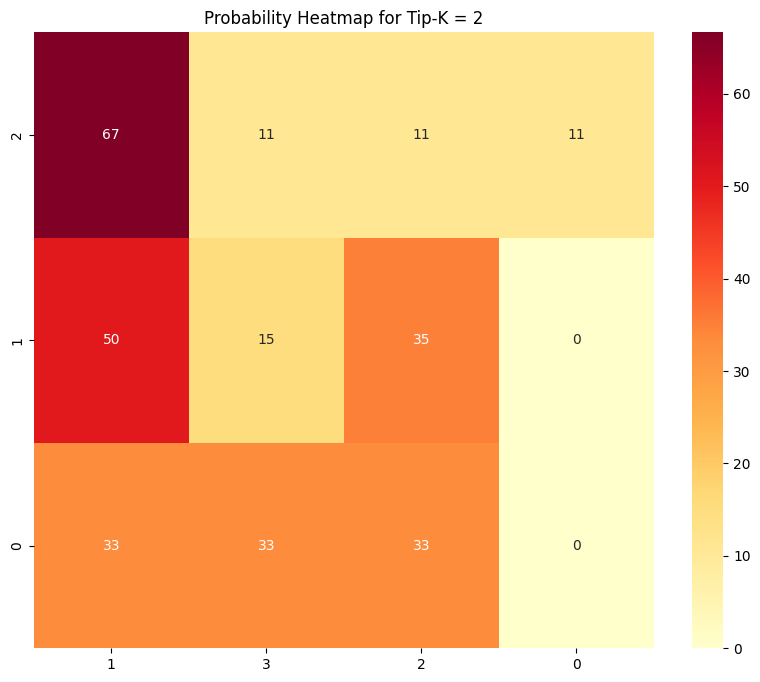

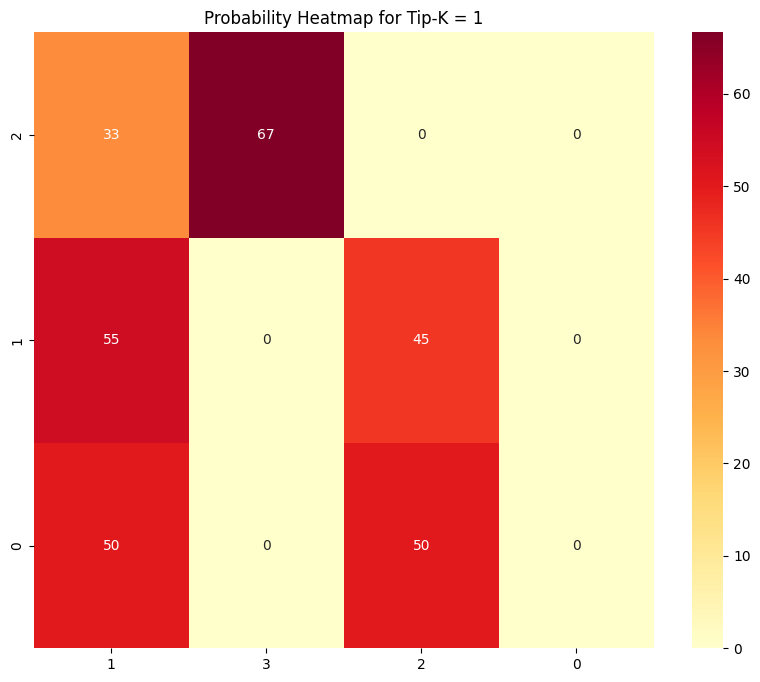

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Find the column that starts with 'CMB Imuno'
stare_col = [col for col in data.columns if col.startswith('Forma clinica')][0]
# Rename the column
data = data.rename(columns={stare_col: 'Forma clinica'})
# Convert the 'Stare externare' column to numeric, non-numeric values become NaN

def plot_probability_forma_clinica_heatmap(data, med_column):
    # Get unique 'Tip-K' values
    tip_k_values = data['Tip-K'].unique()

    # Get unique 'Forma clinica' and 'Stare externare' values
    forma_clinica_values = data[med_column].unique()
    stare_externare_values = data['Stare externare'].unique()

    # Iterate over each 'Tip-K' value
    for tip_k_value in tip_k_values:
        # Filter the data by the current 'Tip-K' value
        data_filtered = data[data['Tip-K'] == tip_k_value]

        # Initialize DataFrame for probabilities
        df_prob = pd.DataFrame(index=forma_clinica_values, columns=stare_externare_values)

        # Iterate over each 'Forma clinica' and 'Stare externare' value
        for fc_value in forma_clinica_values:
            for se_value in stare_externare_values:
                total = len(data_filtered[data_filtered[med_column] == fc_value])
                count = len(data_filtered[(data_filtered[med_column] == fc_value) & (data_filtered['Stare externare'] == se_value)])
                df_prob.loc[fc_value, se_value] = count / total * 100 if total > 0 else 0

        # Convert the values in df_prob to float
        df_prob = df_prob.astype(float)

        # Plot the probabilities as a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df_prob, annot=True, cmap='YlOrRd')
        plt.title(f'Probability Heatmap for Tip-K = {tip_k_value}')
        plt.show()

plot_probability_forma_clinica_heatmap(data, 'Forma clinica')

In [97]:
# Get column names that start with 'TPI-'
tpi_columns = [col for col in data.columns if col.startswith('TPI-')]

# Function to concatenate column names
def concatenate_names(row):
    names = [name.replace('TPI-', '') for name in tpi_columns if row[name] == 'DA']
    return ' + '.join(names)

# Create new 'TPI' column
data['TPI'] = data.apply(concatenate_names, axis=1)
# Count every distinct value of the 'TPI' column
print(data['TPI'].value_counts())

In [98]:
# Count every distinct value of the 'TPI' column
print(data['TPI'].value_counts())

TPI
                                                            22
R VANCOMICINA + L MEROPENEM                                  7
R VANCOMICINA                                                5
L MEROPENEM                                                  4
L AMOXICILINA/ACID-CLAVULANIC                                3
L MEROPENEM + L AMIKACINA                                    2
L DOXICICLINA                                                2
R VANCOMICINA + L DOXICICLINA + L CEFTRIAXONA                2
R VANCOMICINA + L CEFTRIAXONA                                2
L MEROPENEM + L CEFTRIAXONA                                  2
R COLISTIN                                                   2
R VANCOMICINA + L MEROPENEM + L CEFTRIAXONA                  1
L CIPROFLOXACIN                                              1
L CEFTRIAXONA                                                1
L MEROPENEM + L PIPERACILIN-L/TAZOBACTAM + L DOXICICLINA     1
L AMIKACINA + L TRIMETOPRIM/SULFAMETOXAZOL         

In [99]:
# Get column names that start with 'TCA-'
tpi_columns = [col for col in data.columns if col.startswith('TCA-')]

# Function to concatenate column names
def concatenate_names(row):
    names = [name.replace('TCA-', '') for name in tpi_columns if row[name] == 'DA']
    return ' + '.join(names)

# Create new 'TPI' column
data['TCA'] = data.apply(concatenate_names, axis=1)

In [100]:
# Count every distinct value of the 'TPI' column
print(data['TCA'].value_counts())

TCA
L MEROPENEM                                                                             8
                                                                                        7
L CEFTRIAXONA                                                                           7
L AMOXICILINA/ACID-CLAVULANIC                                                           4
R COLISTIN                                                                              3
L AMPICILINA/SULBACTAM                                                                  3
L TRIMETOPRIM/SULFAMETOXAZOL                                                            3
L MEROPENEM + L CEFTRIAXONA                                                             2
L CIPROFLOXACIN + L AMPICILINA/SULBACTAM                                                2
R COLISTIN + L MEROPENEM                                                                2
L AMIKACINA + L MEROPENEM                                                               2
L AMIK

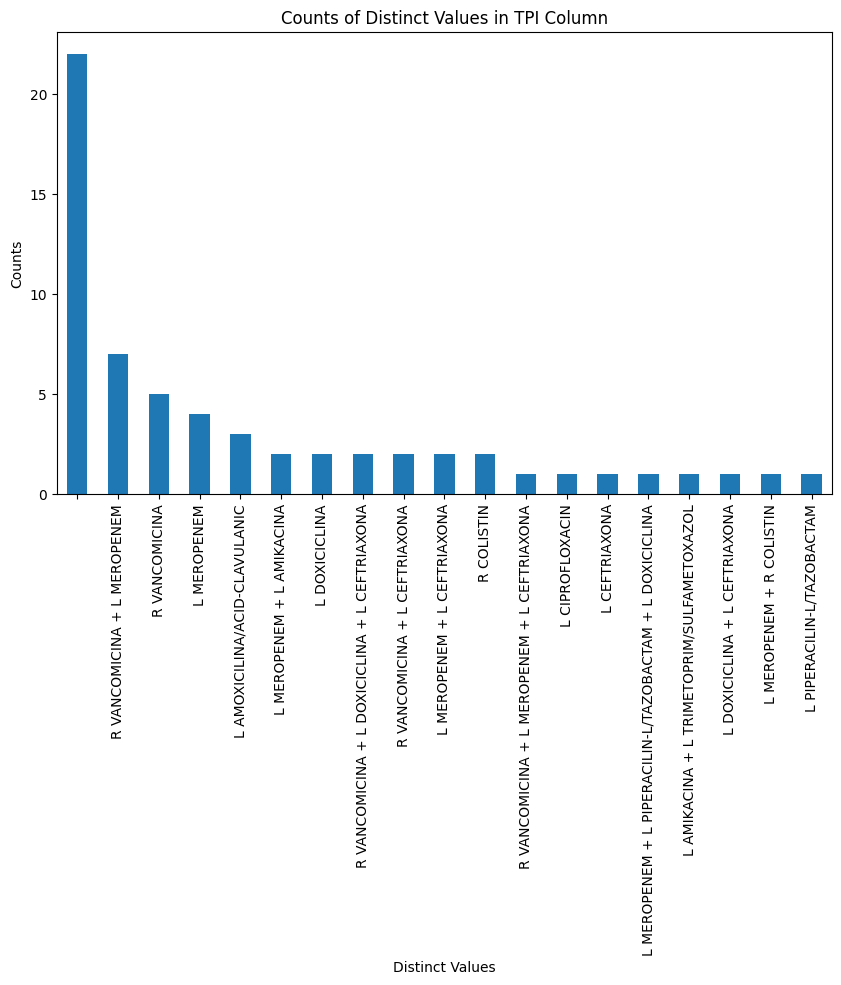

In [101]:
# Plot the counts of the distinct values in the 'TPI' column
data['TPI'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Counts of Distinct Values in TPI Column')
plt.xlabel('Distinct Values')
plt.ylabel('Counts')
plt.show()


In [103]:
# Create new 'TPI : TCA' column
data['TPI:TCA'] = data['TPI'] + ' : ' + data['TCA'].astype(str)

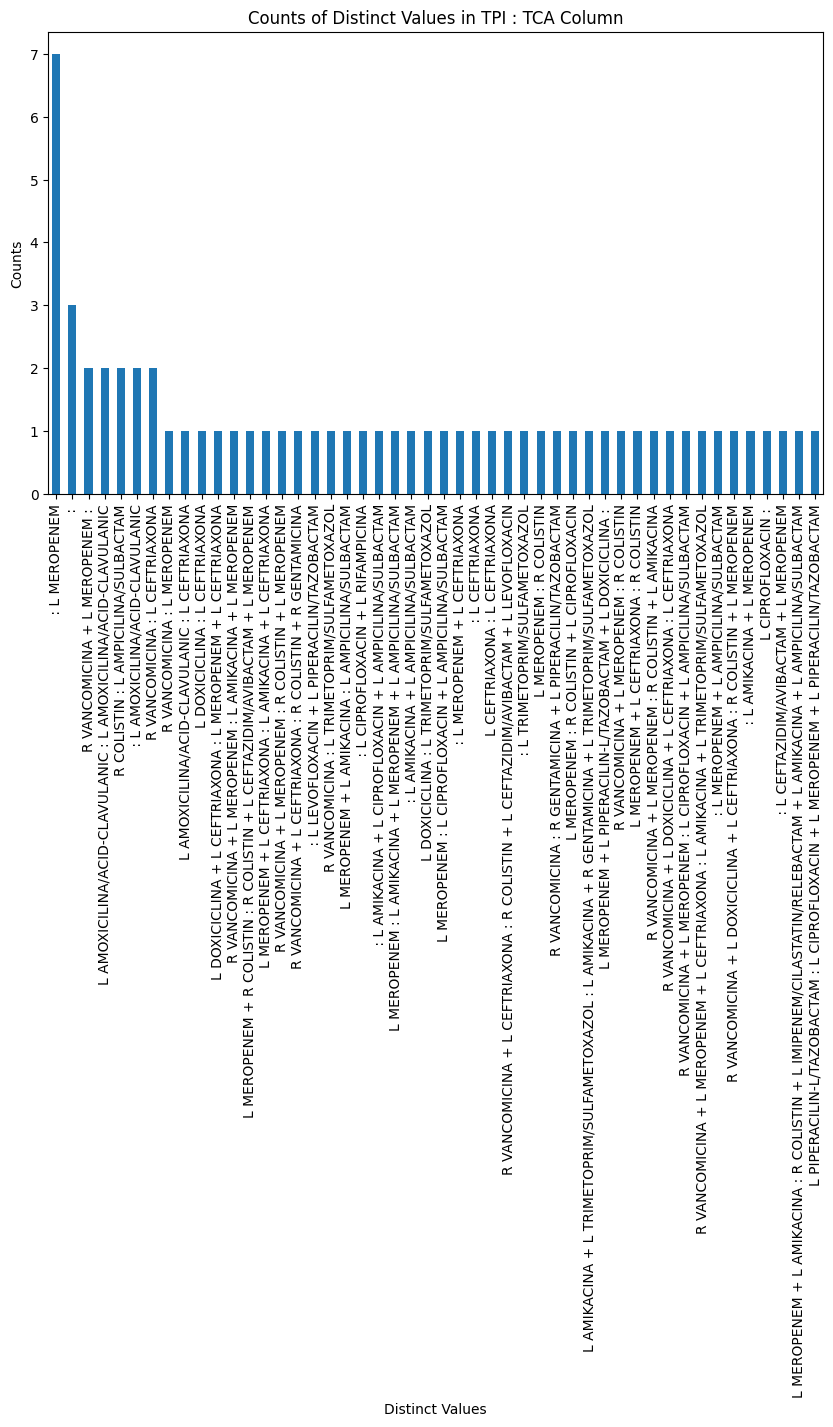

In [104]:
# Plot the counts of the distinct values in the 'TPI' column
data['TPI:TCA'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Counts of Distinct Values in TPI : TCA Column')
plt.xlabel('Distinct Values')
plt.ylabel('Counts')
plt.show()

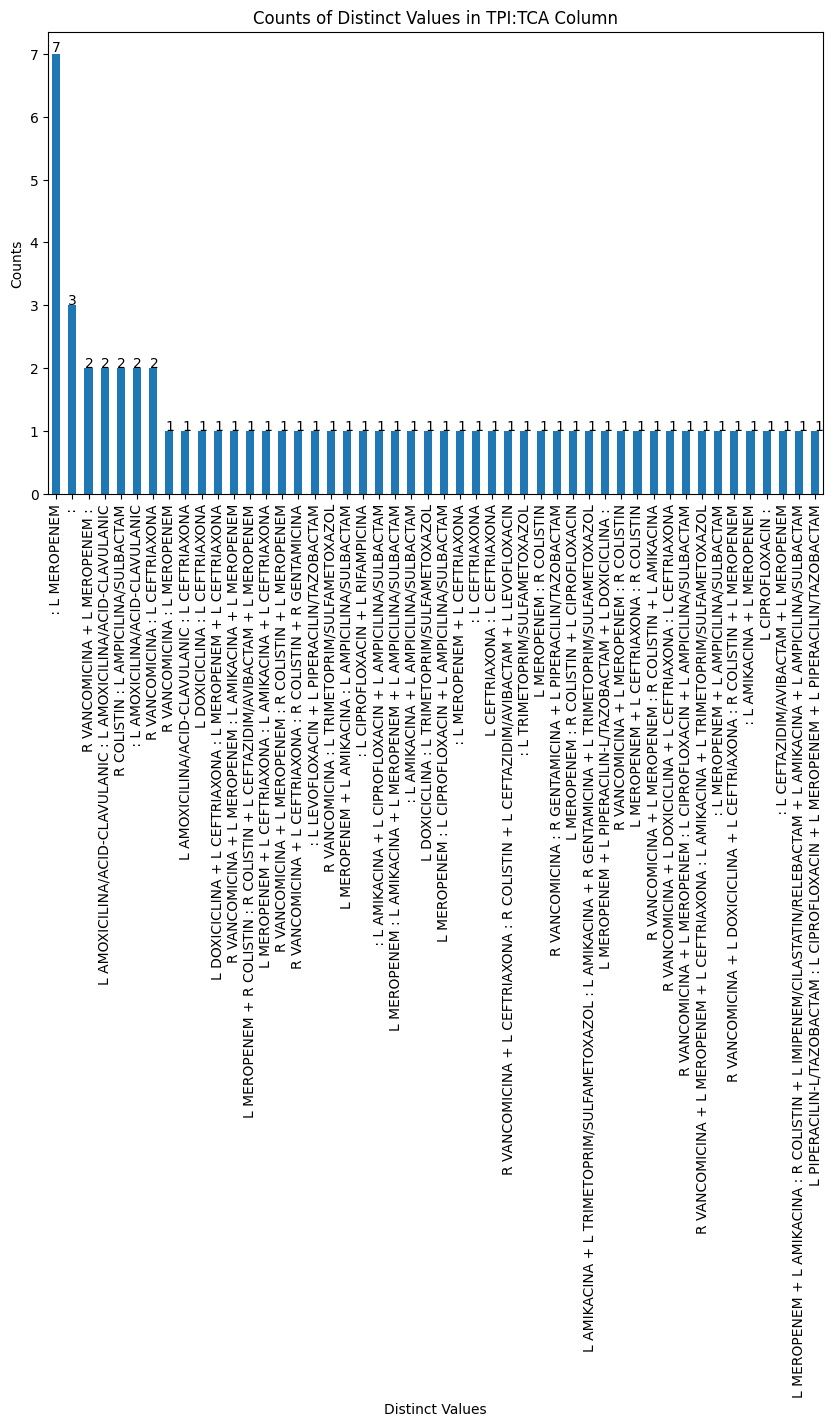

In [105]:
# Plot the counts of the distinct values in the 'TPI : TCA' column
ax = data['TPI:TCA'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Counts of Distinct Values in TPI:TCA Column')
plt.xlabel('Distinct Values')
plt.ylabel('Counts')

# Add the value of each bar on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [119]:
# Function to count 'L ' and 'R ' substrings
def count_substrings(value):
    return str(value.count('L ')) + 'L, ' + str(value.count('R ')) + 'R'

# Create new 'L:R' column
data['L:R'] = 'TPI: ' + data['TPI'].apply(count_substrings) + ' - TCA: ' + data['TCA'].apply(count_substrings)

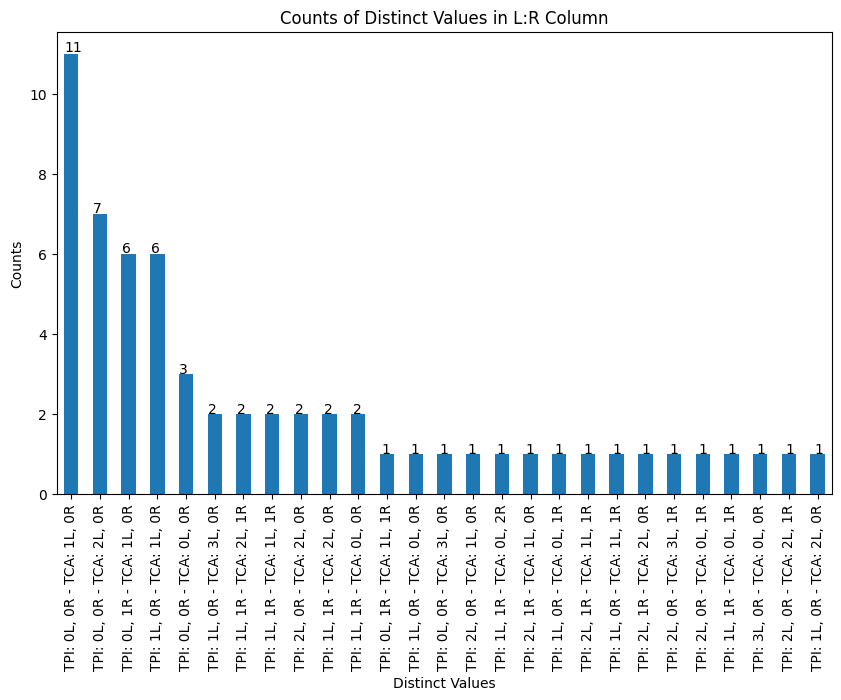

In [120]:
# Plot the counts of the distinct values in the 'L:R' column
ax = data['L:R'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Counts of Distinct Values in L:R Column')
plt.xlabel('Distinct Values')
plt.ylabel('Counts')

# Add the value of each bar on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [113]:
# Delete 'TPI: ' and 'TCA: ' substrings from 'L:R' column
data['L:R'] = data['L:R'].str.replace('TPI: ', '').str.replace('TCA: ', '')

In [115]:
# Count every distinct value of the 'TPI' column
print(data['L:R'].value_counts())

L:R
0L, 0R - 1L, 0R    11
0L, 0R - 2L, 0R     7
0L, 1R - 1L, 0R     6
1L, 0R - 1L, 0R     6
0L, 0R - 0L, 0R     3
1L, 0R - 3L, 0R     2
1L, 1R - 2L, 1R     2
1L, 1R - 1L, 1R     2
2L, 0R - 2L, 0R     2
1L, 1R - 2L, 0R     2
1L, 1R - 0L, 0R     2
0L, 1R - 1L, 1R     1
1L, 0R - 0L, 0R     1
0L, 0R - 3L, 0R     1
2L, 0R - 1L, 0R     1
1L, 1R - 0L, 2R     1
2L, 1R - 1L, 0R     1
1L, 0R - 0L, 1R     1
2L, 1R - 1L, 1R     1
1L, 0R - 1L, 1R     1
2L, 1R - 2L, 0R     1
2L, 0R - 3L, 1R     1
2L, 0R - 0L, 1R     1
1L, 1R - 0L, 1R     1
3L, 0R - 0L, 0R     1
2L, 0R - 2L, 1R     1
1L, 0R - 2L, 0R     1
Name: count, dtype: int64


In [121]:
# Create new 'Count L:R' column
data['Count L:R'] = data['L:R'].str.replace('0L,', '').str.replace('0L', '').str.replace('0R,', '').str.replace('0R', '')

In [124]:
# Count every distinct value of the 'TPI' column
print(data['Count L:R'].value_counts())

Count L:R
TPI:   - TCA: 1L,            11
TPI:   - TCA: 2L,             7
TPI:  1R - TCA: 1L,           6
TPI: 1L,  - TCA: 1L,          6
TPI:   - TCA:                 3
TPI: 1L,  - TCA: 3L,          2
TPI: 1L, 1R - TCA: 2L, 1R     2
TPI: 1L, 1R - TCA: 1L, 1R     2
TPI: 2L,  - TCA: 2L,          2
TPI: 1L, 1R - TCA: 2L,        2
TPI: 1L, 1R - TCA:            2
TPI:  1R - TCA: 1L, 1R        1
TPI: 1L,  - TCA:              1
TPI:   - TCA: 3L,             1
TPI: 2L,  - TCA: 1L,          1
TPI: 1L, 1R - TCA:  2R        1
TPI: 2L, 1R - TCA: 1L,        1
TPI: 1L,  - TCA:  1R          1
TPI: 2L, 1R - TCA: 1L, 1R     1
TPI: 1L,  - TCA: 1L, 1R       1
TPI: 2L, 1R - TCA: 2L,        1
TPI: 2L,  - TCA: 3L, 1R       1
TPI: 2L,  - TCA:  1R          1
TPI: 1L, 1R - TCA:  1R        1
TPI: 3L,  - TCA:              1
TPI: 2L,  - TCA: 2L, 1R       1
TPI: 1L,  - TCA: 2L,          1
Name: count, dtype: int64


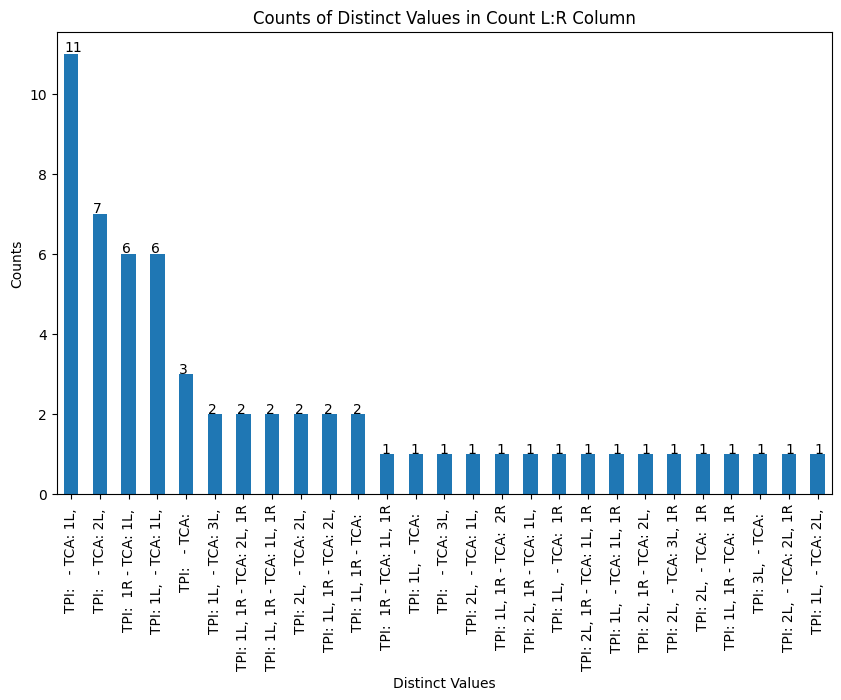

In [123]:
# Plot the counts of the distinct values in the 'L:R' column
ax = data['Count L:R'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.title('Counts of Distinct Values in Count L:R Column')
plt.xlabel('Distinct Values')
plt.ylabel('Counts')

# Add the value of each bar on top of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()